In [1]:
%run ../src/start.py


python	3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
---------------------
Versions:
----------------------
pandas      1.1.2
numpy       1.19.1
matplotlib  3.3.1
seaborn     0.11.0
plotly      4.11.0
----------------------


Loaded Libraries
-------------------
import pandas as pd
import numpy as np
import sys,os
import re
import glob
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
----------------


GLOBAL VARIABLES
--------------------------
HERE_DIR: list current directory path
RAW_DIR: list files in `data\raw` directory
INTER_DIR: list files in `data\interim` directory
FINAL_DIR: list files in `data\final` directory
SRC_DIR: list files in `src\` directory
------------------------------

# SAVE PLOTS
To save a plot call
`save_plots(fig_variable,'name_of_plot')`

source file: src/start.py




# Explore Crime data

In [5]:
ls ../data/raw/crime_data/2020

'~$NIBRSPublicView.Jan1-Dec31-2020.xlsx'*
 NIBRSPublicView.Jan1-Dec31-2020.csv*
 NIBRSPublicView.Jan1-Dec31-2020.xlsx*


In [7]:
file_name = 'NIBRSPublicView.Jan1-Dec31-2020.csv'
raw_data = os.path.join('..', 'data','raw','crime_data','2020',f'{file_name}')

In [46]:
df = pd.read_csv(raw_data)
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('\n','_').str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247911 entries, 0 to 247910
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   incident          247911 non-null  int64 
 1   occurrence_date   247911 non-null  object
 2   occurrence_hour   247911 non-null  int64 
 3   nibrs_class       247911 non-null  object
 4   nibrsdescription  247911 non-null  object
 5   offense_count     247911 non-null  int64 
 6   beat              247705 non-null  object
 7   premise           247910 non-null  object
 8   block_range       247339 non-null  object
 9   streetname        247911 non-null  object
 10  street_type       228497 non-null  object
 11  suffix            36290 non-null   object
 12  city              247911 non-null  object
 13  zip_code          245155 non-null  object
dtypes: int64(3), object(11)
memory usage: 26.5+ MB


In [32]:
# clean columns
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('\n','_').str.strip()

In [33]:
df.columns.tolist()

['incident',
 'occurrence_date',
 'occurrence_hour',
 'nibrs_class',
 'nibrsdescription',
 'offense_count',
 'beat',
 'premise',
 'block_range',
 'streetname',
 'street_type',
 'suffix',
 'city',
 'zip_code']

In [36]:
df.head().T

,0,1,2,3,4
incident,79220,59342520,123324720,233120,240920
occurrence_date,1/1/2020,1/1/2020,1/1/2020,1/1/2020,1/1/2020
occurrence_hour,0,0,0,0,0
nibrs_class,120,220,220,240,240
nibrsdescription,Robbery,"Burglary, Breaking and Entering","Burglary, Breaking and Entering",Motor vehicle theft,Motor vehicle theft
offense_count,1,1,1,1,1
beat,12D60,14D40,4F10,16E30,20G30
premise,"Residence, Home (Includes Apartment)","Residence, Home (Includes Apartment)",Restaurant,"Parking Lot, Garage","Residence, Home (Includes Apartment)"
block_range,16302,12000,9440,14711,3030
streetname,EL CAMINO REAL,MARTIN LUTHER KING,KATY,MAIN,SHADOWBRIAR


## Show null dat

In [38]:
df.apply(lambda x: sum(x.isnull()))

incident                 0
occurrence_date          0
occurrence_hour          0
nibrs_class              0
nibrsdescription         0
offense_count            0
beat                   206
premise                  1
block_range            572
streetname               0
street_type          19414
suffix              211621
city                     0
zip_code              2756
dtype: int64

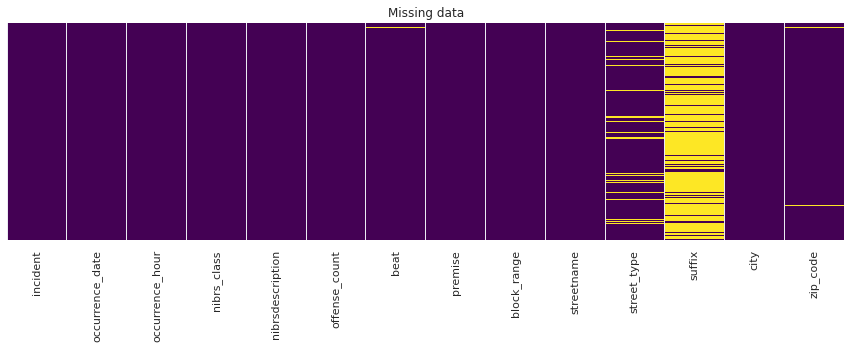

In [37]:
plt.figure(figsize=(15,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing data')
plt.show()

## Explore columns

In [39]:
df.columns


Index(['incident', 'occurrence_date', 'occurrence_hour', 'nibrs_class',
       'nibrsdescription', 'offense_count', 'beat', 'premise', 'block_range',
       'streetname', 'street_type', 'suffix', 'city', 'zip_code'],
      dtype='object')

In [44]:
df.nibrs_class.value_counts()

23F    27720
13B    25532
290    23315
13C    18352
23H    17834
13A    16415
220    15373
240    14669
90Z    13686
23C    11841
120     8816
35A     7759
90D     7508
23G     7353
90J     5418
520     2930
23D     2869
26F     2543
26B     2343
26A     2225
250     2093
90C     2050
35B     1205
90E      880
11A      691
90F      565
200      532
11D      487
11B      415
370      414
09A      385
40A      363
23B      348
280      336
270      325
720      310
40C      252
100      236
23A      232
23E      226
210      194
26G      100
90A      100
64A       98
26C       94
36B       83
11C       75
90G       64
40B       53
90B       46
26E       37
90H       29
26D       20
510       16
39C       15
90I       13
09B       12
39A        5
39B        4
64B        3
36A        3
09C        1
Name: nibrs_class, dtype: int64

In [43]:
df.nibrsdescription.value_counts()

Theft from motor vehicle                     27720
Simple assault                               25532
Destruction, damage, vandalism               23315
Intimidation                                 18352
All other larceny                            17834
Aggravated Assault                           16415
Burglary, Breaking and Entering              15373
Motor vehicle theft                          14669
All other offenses                           13686
Shoplifting                                  11841
Robbery                                       8816
Drug, narcotic violations                     7759
Driving under the influence                   7508
Theft of motor vehicle parts or accessory     7353
Trespass of real property                     5418
Weapon law violations                         2930
Theft from building                           2869
Identify theft                                2543
Credit card, ATM fraud                        2343
False pretenses, swindle       